In [46]:
import pandas as pd

In [47]:
train_data = pd.read_csv('data/train_data_20221117.csv', index_col = 0)
test_data = pd.read_csv('data/test_data_20221117.csv', index_col = 0)

X_train = train_data.drop(columns = 'Survived')
y_train = train_data['Survived']
X_test  = test_data.drop(columns = 'Survived')
y_test  = test_data['Survived']

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [49]:
len(X_train.columns)

15

In [50]:
importance = pd.Series(model.coef_[0], index = X_train.columns)
importance = l.reindex(l.abs().sort_values().index[::-1])
importance

Title_Mr       -1.878570
Title_Mrs       1.705519
Title_Noble    -1.395307
Title_Master    0.886508
Pclass         -0.736147
Title_Ms        0.686296
Age_true        0.484523
SibSp          -0.477886
Embarked_S     -0.443222
Parch          -0.339224
Embarked_C      0.306666
AgeGroup       -0.250298
Embarked_Q      0.141001
CabinLvl        0.083557
FareGroup       0.050883
dtype: float64

In [51]:
[r'$Title_{Mr}$'] + list(importance.index)[1:]

['$Title_{Mr}$',
 'Title_Mrs',
 'Title_Noble',
 'Title_Master',
 'Pclass',
 'Title_Ms',
 'Age_true',
 'SibSp',
 'Embarked_S',
 'Parch',
 'Embarked_C',
 'AgeGroup',
 'Embarked_Q',
 'CabinLvl',
 'FareGroup']

In [52]:
xticklabels = []
for xtick in importance.index:
    if xtick == 'Age_true':
        xticklabels.append(xtick)
        continue
    split = xtick.split('_')
    if len(split) == 1:
        xticklabels.append(r'$'+xtick+r'$')
    elif len(split) == 2:
        xticklabels.append(r'$'+split[1]+r'_{'+split[0]+r'}$')
xticklabels

['$Mr_{Title}$',
 '$Mrs_{Title}$',
 '$Noble_{Title}$',
 '$Master_{Title}$',
 '$Pclass$',
 '$Ms_{Title}$',
 'Age_true',
 '$SibSp$',
 '$S_{Embarked}$',
 '$Parch$',
 '$C_{Embarked}$',
 '$AgeGroup$',
 '$Q_{Embarked}$',
 '$CabinLvl$',
 '$FareGroup$']

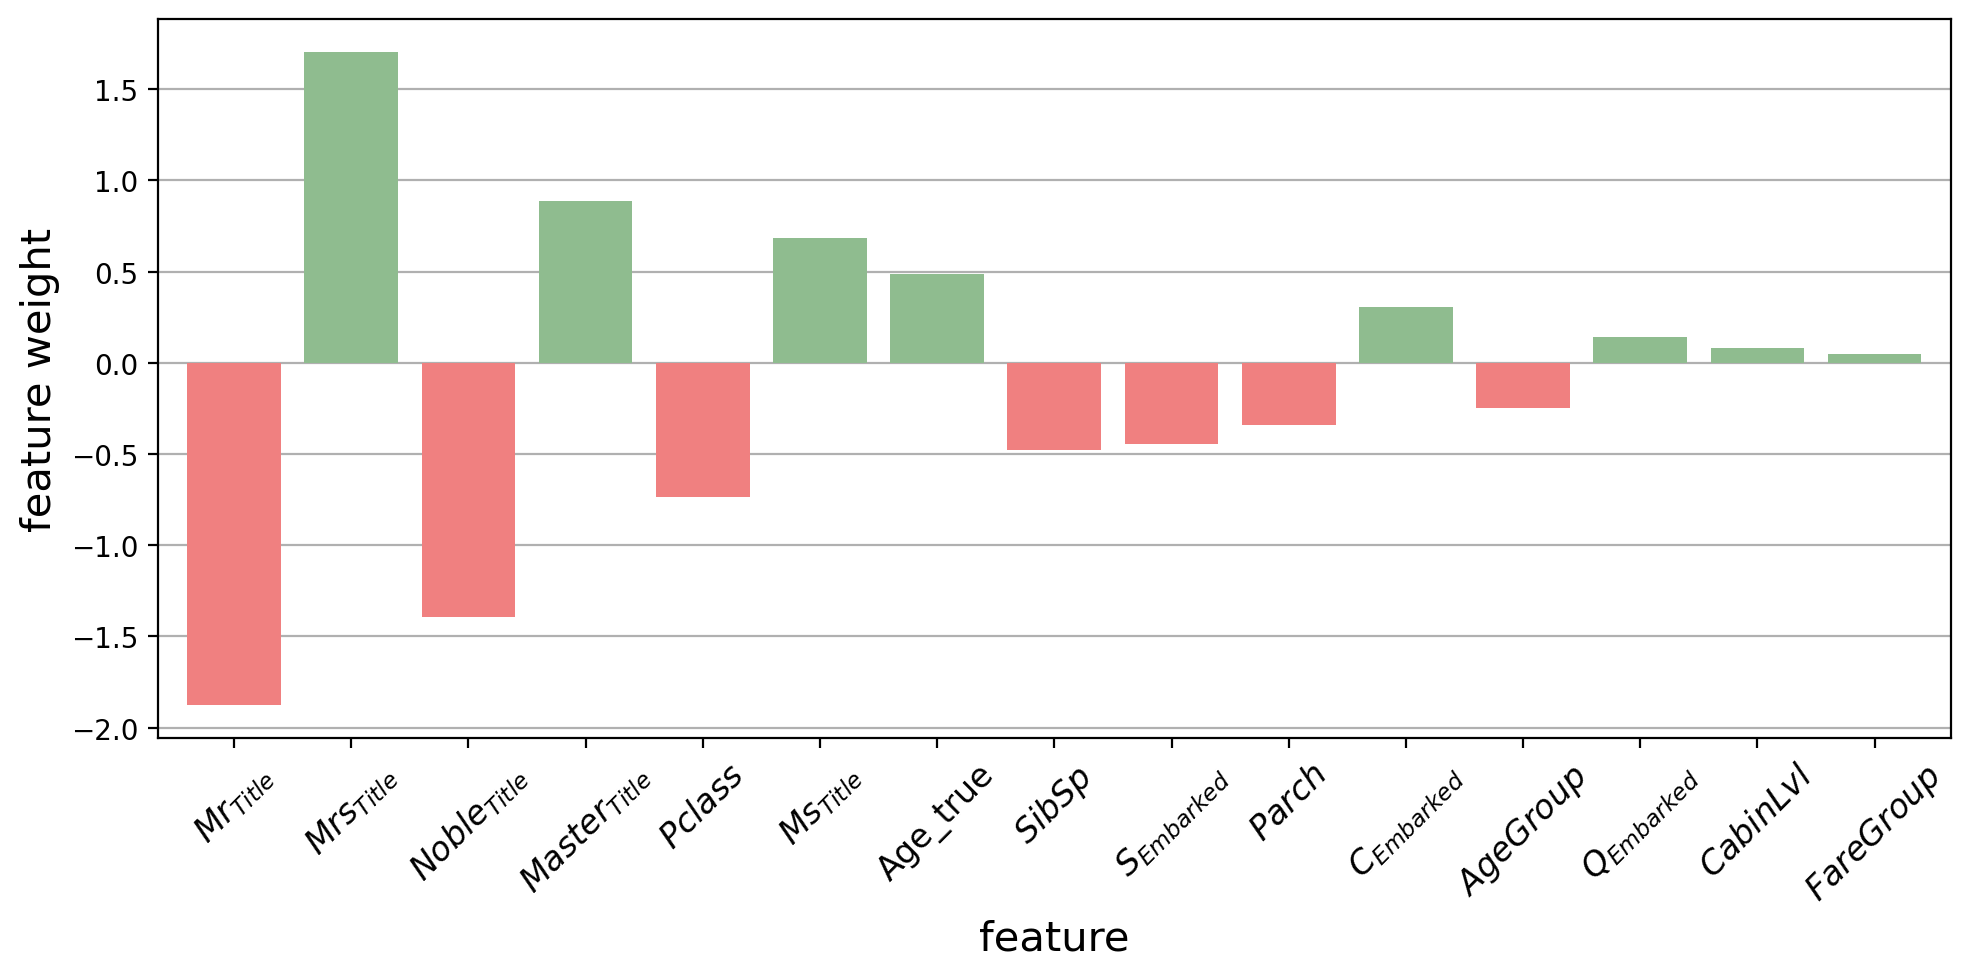

In [53]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(10,5), dpi = 200)

positives = importance.where(importance > 0, np.nan)
negatives = importance.where(importance < 0, np.nan)

positives.plot.bar(width = 0.8, color = 'darkseagreen')
negatives.plot.bar(width = 0.8, color = 'lightcoral')

plt.xticks(range(len(importance)), xticklabels, rotation = 45, fontsize =12)
plt.grid(axis = 'y')

plt.xlabel(r'feature', rotation = 0, fontsize = 15)
plt.ylabel(r'feature weight', rotation = 90, fontsize = 15)

plt.tight_layout()
plt.show()

In [4]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [5]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

acc=0.7985074626865671
f1=0.7692307692307694


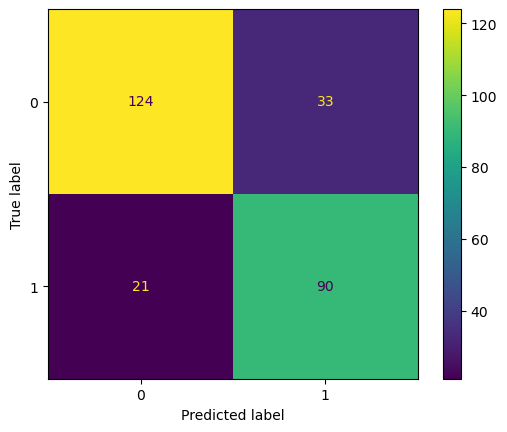

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

predictions = naive_bayes.predict(X_test)

cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f'{acc=}')
print(f'{f1=}')
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [7]:
for feature in X_test.columns:
    print(feature)
    for value in X_test[feature].unique():
        indices = X_test[feature] == value
        true_feature = y_test[indices]
        pred_feature = predictions[indices]
        print(' -', value, ': true = ', sum(true_feature), '\tpred = ', sum(pred_feature))

Pclass
 - 3 : true =  34 	pred =  41
 - 2 : true =  24 	pred =  29
 - 1 : true =  53 	pred =  53
SibSp
 - 1 : true =  39 	pred =  46
 - 0 : true =  68 	pred =  71
 - 2 : true =  4 	pred =  3
 - 3 : true =  0 	pred =  3
 - 4 : true =  0 	pred =  0
Parch
 - 1 : true =  18 	pred =  26
 - 0 : true =  78 	pred =  75
 - 2 : true =  14 	pred =  19
 - 3 : true =  0 	pred =  1
 - 4 : true =  0 	pred =  0
 - 5 : true =  1 	pred =  2
Age_true
 - 0 : true =  20 	pred =  18
 - 1 : true =  91 	pred =  105
AgeGroup
 - 0 : true =  11 	pred =  15
 - 3 : true =  27 	pred =  22
 - 2 : true =  26 	pred =  29
 - 1 : true =  7 	pred =  7
 - 4 : true =  30 	pred =  34
 - 5 : true =  10 	pred =  16
FareGroup
 - 2 : true =  18 	pred =  27
 - 1 : true =  14 	pred =  13
 - 3 : true =  32 	pred =  31
 - 4 : true =  24 	pred =  27
 - 0 : true =  9 	pred =  8
 - 5 : true =  14 	pred =  17
CabinLvl
 - 0 : true =  65 	pred =  74
 - 4 : true =  12 	pred =  12
 - 5 : true =  12 	pred =  12
 - 7 : true =  3 	pred =  4
 

In [19]:
naive_bayes.class_count_

array([392., 231.])

In [20]:
naive_bayes.class_prior_

array([0.62921348, 0.37078652])